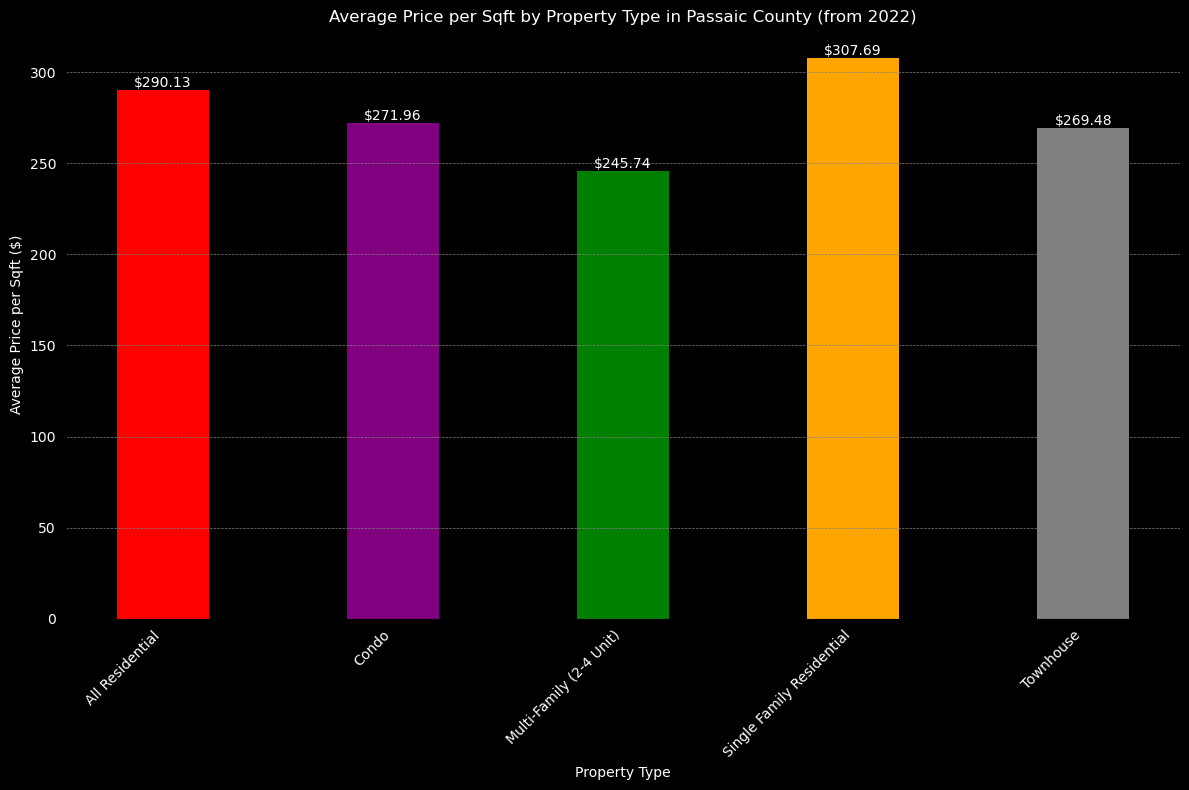

'c:/users/loutz/repo/project1/Passaic_County_Median_Price_per_Sqft_Customized_Thin.png'

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = ../resources/fullcleaned_county_market_tracker.csv
data = pd.read_csv(file_path)

# Filter the data for Passaic County and from 2022 onwards
data['Start Date'] = pd.to_datetime(data['Start Date'], errors='coerce')
passaic_data = data[(data['County'] == 'Passaic County') & (data['Start Date'] >= '2022-01-01')]

# Extract relevant columns for the bar graph
passaic_data = passaic_data[['Start Date', 'Property Type', 'Median Price per Sqft']]

# Remove rows with missing values in the 'Median Price per Sqft' column
passaic_data = passaic_data.dropna(subset=['Median Price per Sqft'])

# Convert 'Median Price per Sqft' to numerical value
passaic_data['Median Price per Sqft'] = passaic_data['Median Price per Sqft'].replace('[\$,]', '', regex=True).astype(float)

# Group by 'Property Type' and calculate the median price per sqft
median_price_per_sqft = passaic_data.groupby('Property Type')['Median Price per Sqft'].median().reset_index()

# Define colors for specific property types
colors = {
    'All Residential': 'red',
    'Condo': 'purple',
    'Multi-Family (2-4 Unit)': 'green',
    'Single Family Residential': 'orange',
    'Townhouse': 'gray'
}

# Plotting the updated bar graph with thin bars and only horizontal gridlines
plt.figure(figsize=(12, 8), facecolor='black')
bars = plt.bar(median_price_per_sqft['Property Type'], median_price_per_sqft['Median Price per Sqft'], 
               color=[colors.get(ptype, 'skyblue') for ptype in median_price_per_sqft['Property Type']],
               width=0.4)

# Add dollar and cents labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, f'${yval:,.2f}', ha='center', va='bottom', color='white')

plt.xlabel('Property Type', color='white')
plt.ylabel('Average Price per Sqft ($)', color='white')
plt.title('Average Price per Sqft by Property Type in Passaic County (from 2022)', color='white')
plt.xticks(rotation=45, ha='right', color='white')
plt.yticks(color='white')
plt.gca().set_facecolor('black')
plt.grid(axis='y', color='gray', linestyle='--', linewidth=0.5)

plt.tight_layout()

# Save the updated figure
plot_path_customized_thin = 'c:/users/loutz/repo/project1/Passaic_County_Median_Price_per_Sqft_Customized_Thin.png'
plt.savefig(plot_path_customized_thin, facecolor='black')

# Display the plot
plt.show()

plot_path_customized_thin
